
<font face="cursive" size="8">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Titanic Survived Project
</span>

</font>



### Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It
gives you information about multiple people like their ages, sexes, sibling counts, embarkment
points, and whether or not they survived the disaster.
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive
the sinking or not.

### Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

- PassengerId: A unique identifier assigned to each passenger.
- Survived: Indicates whether a passenger survived the sinking of the Titanic. (0 = No, 1 = Yes)
- Pclass: The passenger's ticket class. (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
- Name: The name of the passenger.
- Sex: The gender of the passenger. (Male or Female)
- Age: The age of the passenger in years.
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic.
- Parch: The number of parents or children the passenger had aboard the Titanic.
- Ticket: The ticket number.
- Fare: The fare or price paid for the ticket.
- Cabin: The cabin number.
- Embarked: The port of embarkation for the passenger. (C = Cherbourg, Q = Queenstown, S = Southampton)


<font face="cursive" size="6.5">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Importing Libraries
</span>

</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from scipy import stats
import scipy.stats as stats
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')


<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
 Load Dataset
</span>

</font>

In [2]:
df = pd.read_csv("titanic_train.csv")

In [3]:
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C



<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Exploratory Data Analysis(EDA)
</span>

</font>

In [4]:
#checking the shape of dataset
print("There are {} rows and {} columns respectively present in the dataset.".format(*df.shape))

There are 891 rows and 13 columns respectively present in the dataset.


In [5]:
# checking columns in Dataset
print("these are the columns present in the dataset:  \n\n",df.columns)

these are the columns present in the dataset:  

 Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Observation:
- Data Have float64(2), int64(6), object(5) 

In [7]:
#Checking null values
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ovservation:
- 1.Missing values in Age, cabin and Embarked columns
- 2. More than 70% values are missing in cabin column
- 3. Few columns have inappropriate data types

In [8]:
# Dropping Cabin cause it has more then 70% null values
# Dropping Unnamed: 0 as i dont think it will help in prediction
# Dropping the PassengerID cause it has no relation with Survived
df.drop(columns=['Cabin','Unnamed: 0','PassengerId'], inplace=True)



<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Imputing missing values
</span>

</font>

In [9]:
#impute missing values for age by mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [10]:
# Impute missing values for Embarked
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Describing Dataset
</span>

</font>

In [11]:
df.describe(include=['object']).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Embarked,889,3,S,644


Observation:
Name and Ticket have high cardinality. I will not consider them for analysis.

In [12]:
# dropping name and ticket
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
# want to check one more thing Should i check the sibsp and parch to categories
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [15]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Changing data type for the following cols
</span>

</font>


- Survived(category)
- PClass(category)
- Sex(category)
- Age(int)
- Embarked(category)

In [16]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    int32   
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(4), float64(1), int32(1), int64(2)
memory usage: 28.5 KB


In [18]:
df.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.544332,0.523008,0.381594,32.204208
std,13.013778,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200



<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
 Univariate Analysis
</span>

</font>

Out of 891: 62 people died in the accident


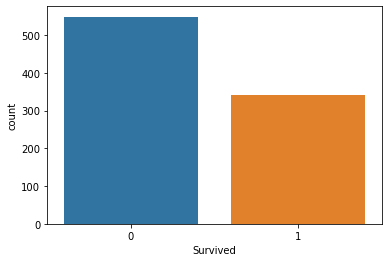

In [19]:
# Lets Start with the Survived Column
sns.countplot(df['Survived'])

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891: {} people died in the accident".format(death_percent))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

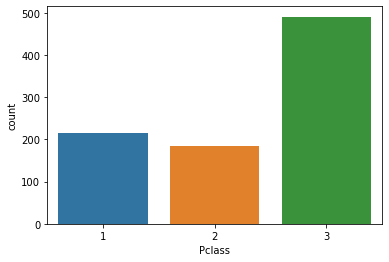

In [20]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(df['Pclass'])


Observation:
- Pclass was the most crowded class    

male      64.758698
female    35.241302
Name: Sex, dtype: float64


<AxesSubplot:xlabel='Sex', ylabel='count'>

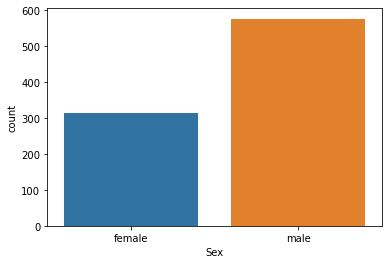

In [21]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

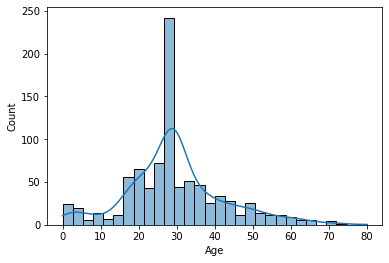

In [22]:
# checking age 
sns.histplot(df.Age,kde=True)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

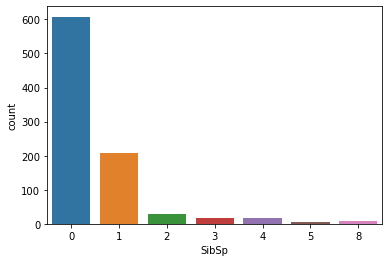

In [23]:
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


<AxesSubplot:xlabel='Parch', ylabel='count'>

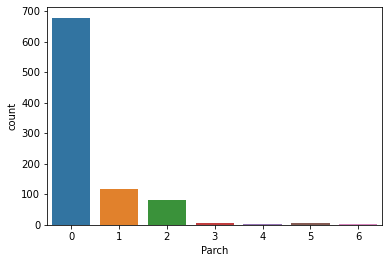

In [24]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(df['Parch'])

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

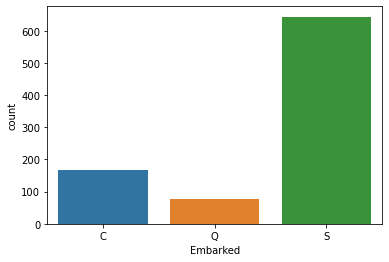

In [25]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(df['Embarked'])

Observation:
- Most of the people are from Southampton then Cherbourg And then Queenstown . Maybe the reason behind is Southampton is the first station of the ship.

0.45956263424701577
0.9865867453652877


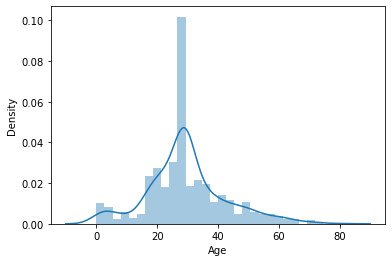

In [26]:
# Age column

sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

Observation:
- based on the skewness and kurtosis values, the 'Age' distribution appears to be slightly positively skewed and has heavier tails compared to a normal distribution.

<AxesSubplot:xlabel='Age'>

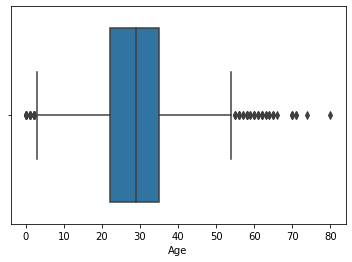

In [27]:
sns.boxplot(df['Age'])

Ovservation:
- For all practical purposes age can be cosidered as normal distribution
- Deeper analysis is required for outlier detection

In [28]:
# Just out of curiosity

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


<AxesSubplot:xlabel='Fare', ylabel='Density'>

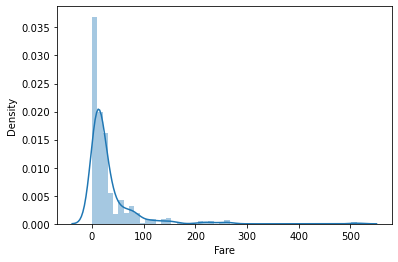

In [29]:
# Fare column

sns.distplot(df['Fare'])

In [30]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


Observation:
 - based on the skewness and kurtosis values, the 'Fare' distribution is highly positively skewed with a long right tail and has extremely heavy tails compared to a normal distribution. 

<AxesSubplot:xlabel='Fare'>

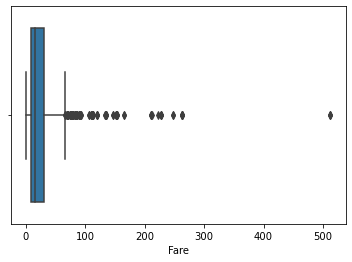

In [31]:
sns.boxplot(df['Fare'])

In [32]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


Observation:
- Highly skewed data, a lot of people had cheaper tickets
- Outliers are there in the data


<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Multivariate Analysis
</span>

</font>

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


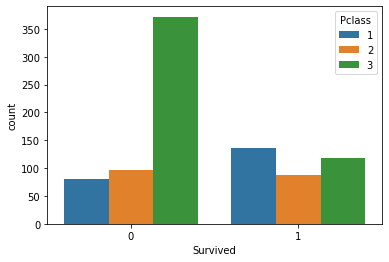

In [33]:


# Survival with Pclass

sns.countplot(df['Survived'], hue=df['Pclass'])

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


Observations from the crosstab:

- Passenger Class 1: Among the passengers in Pclass 1, approximately 63.0% survived, while 37.0% did not survive.

- Passenger Class 2: For Pclass 2, approximately 47.3% survived, while 52.7% did not survive.

- Passenger Class 3: In Pclass 3, only about 24.2% survived, while a significant majority of 75.8% did not survive.

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


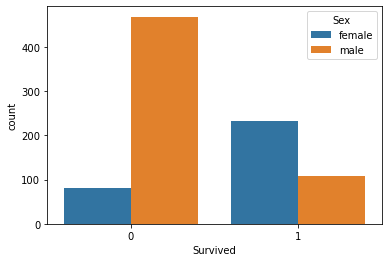

In [34]:
# Survival with Sex

sns.countplot(df['Survived'], hue=df['Sex'])

pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Observations from the crosstab:

- Females: Among the female passengers, approximately 74.2% survived, while 25.8% did not survive.

- Males: For male passengers, only about 18.9% survived, while a majority of 81.1% did not survive.

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.3,33.7


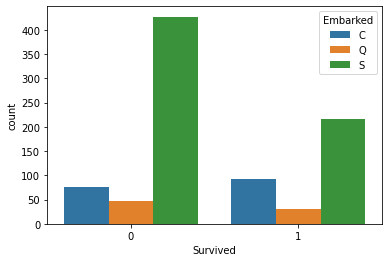

In [35]:
# Survival with Embarked

sns.countplot(df['Survived'], hue=df['Embarked'])

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


Observations from the crosstab:

- Embarked at C: Among the passengers who embarked at C, approximately 55.4% survived, while 44.6% did not survive.

- Embarked at Q: For passengers who embarked at Q, approximately 39.0% survived, while 61.0% did not survive.

- Embarked at S: Among the passengers who embarked at S, only about 33.7% survived, while a majority of 66.3% did not survive.

<AxesSubplot:xlabel='Age', ylabel='Density'>

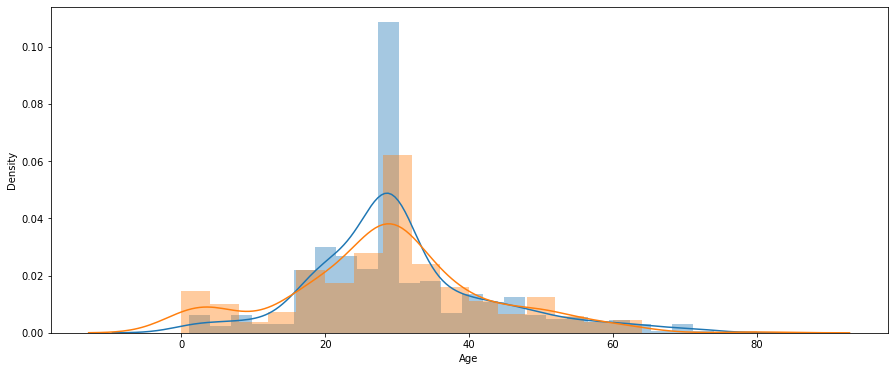

In [36]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

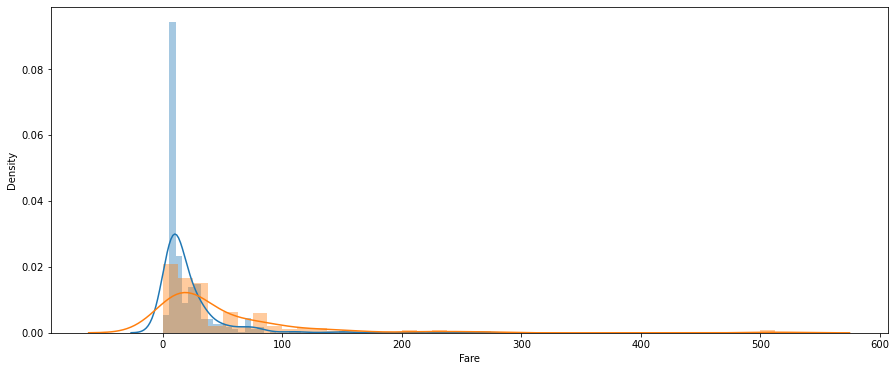

In [37]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

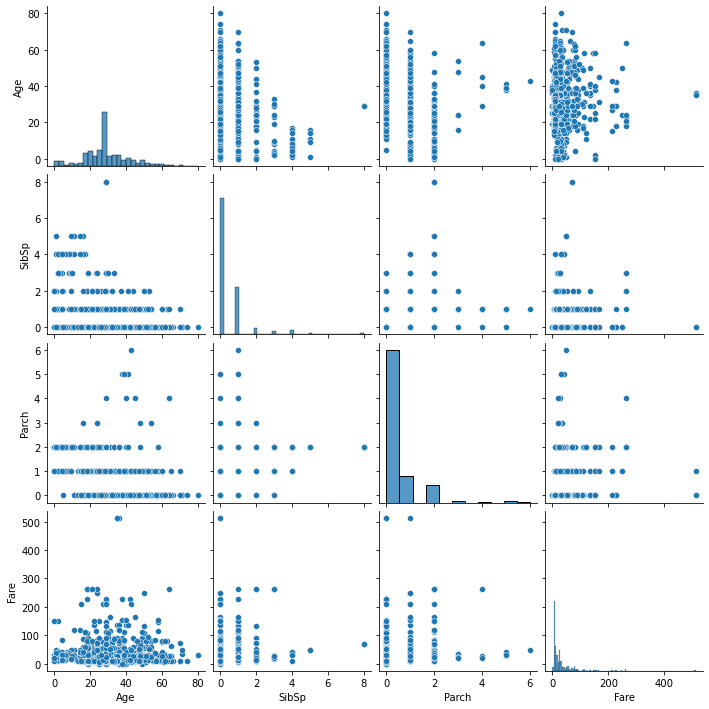

In [38]:
sns.pairplot(df)

<AxesSubplot:>

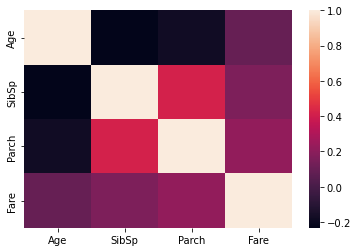

In [39]:
sns.heatmap(df.corr())

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Feature Engineering
</span>

</font>

In [40]:


# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [41]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
583,0,1,male,36,0,0,40.1250,C,0
373,0,1,male,22,0,0,135.6333,C,0
757,0,2,male,18,0,0,11.5000,S,0
805,0,3,male,31,0,0,7.7750,S,0
415,0,3,female,29,0,0,8.0500,S,0


In [42]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [43]:
df['family_type']=df['family_size'].apply(family_type)

In [44]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,family_type
408,0,3,male,21,0,0,7.7750,S,0,Alone
220,1,3,male,16,0,0,8.0500,S,0,Alone
818,0,3,male,43,0,0,6.4500,S,0,Alone
764,0,3,male,16,0,0,7.7750,S,0,Alone
469,1,3,female,0,2,1,19.2583,C,3,Medium


In [45]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [46]:
df.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_type
140,0,3,female,29,15.2458,C,Medium
490,0,3,male,29,19.9667,S,Medium
7,0,3,male,2,21.0750,S,Medium
336,0,1,male,29,66.6000,S,Medium
574,0,3,male,16,8.0500,S,Alone


In [47]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


Observations from the crosstab:

- Alone: Among the passengers who were alone (without any family members onboard), approximately 30.4% survived, while 69.6% did not survive.

- Large: For passengers who were part of large families, approximately 14.9% survived, while 85.1% did not survive.

- Medium: Among the passengers who were part of medium-sized families, approximately 56.0% survived, while 44.0% did not survive.


<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Detecting outliers
</span>

</font>

### Numerical Data
- if the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier
- if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR

### Categorical data

If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [48]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 7)

In [49]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [50]:
df.sample(4)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_type
517,0,3,male,29,24.1500,Q,Alone
867,0,1,male,31,50.4958,S,Alone
706,1,2,female,45,13.5000,S,Alone
710,1,1,female,24,49.5042,C,Alone


<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Changing Dtypes
</span>

</font>

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     769 non-null    category
 1   Pclass       769 non-null    category
 2   Sex          769 non-null    category
 3   Age          769 non-null    int32   
 4   Fare         769 non-null    float64 
 5   Embarked     769 non-null    category
 6   family_type  769 non-null    object  
dtypes: category(4), float64(1), int32(1), object(1)
memory usage: 24.5+ KB


In [52]:
df['Survived']=df['Survived'].astype('int32')
df['Pclass']=df['Pclass'].astype('int32')
df['Sex']=df['Sex'].astype('object')
df['Age']=df['Age'].astype('int32')
df['Embarked']=df['Embarked'].astype('object')

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Encoding Categorical Columns
</span>

</font>

In [53]:
df=pd.get_dummies(data=df, columns=['Sex','Embarked','family_type'], drop_first=True)


<AxesSubplot:>

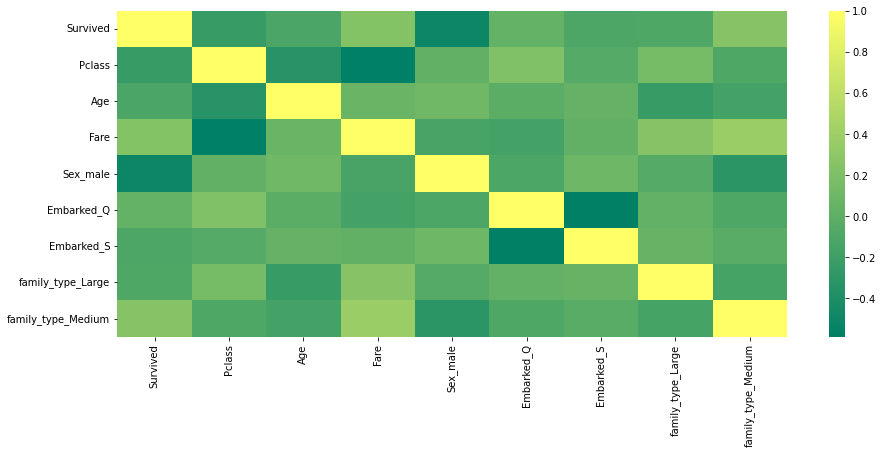

In [54]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='summer')

In [55]:
df['Survived'].value_counts()

0    507
1    262
Name: Survived, dtype: int64

Observation:
- data is looking imbalanced there are 0 = 507 & 1 = 262


<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Scaling data Using StandardScaler
</span>

</font>

In [56]:
scaler = StandardScaler()
features_to_scale =['Pclass','Age','Fare']
scaled_features = scaler.fit_transform(df[features_to_scale])
scaled_df = df.copy()
scaled_df[features_to_scale] = scaled_features

In [57]:
scaled_df

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,0,0.705178,-0.540039,-0.777547,1,0,1,0,1
2,1,0.705178,-0.212717,-0.727699,0,0,1,0,0
3,1,-2.033619,0.523758,2.608437,0,0,1,0,1
4,0,0.705178,0.523758,-0.718468,1,0,1,0,0
5,0,0.705178,0.032775,-0.688315,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,-0.664221,-0.130886,-0.352914,1,0,1,0,0
887,1,-2.033619,-0.785531,0.902522,0,0,1,0,0
888,0,0.705178,0.032775,0.418810,0,0,1,0,1
889,1,-2.033619,-0.212717,0.902522,1,0,0,0,0



<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Deviding into Feature and Label
</span>

</font>

In [58]:
X = scaled_df.drop('Survived', axis = 1)
y = scaled_df['Survived']


<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Data Balancing Using SMOTE
</span>

</font>

In [59]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [60]:
y_resampled.value_counts()

0    507
1    507
Name: Survived, dtype: int64

Observation:
- now data looks balanced


<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Train Test Split
</span>

</font>

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)


<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Model Training
</span>

</font>

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Logistic Regression with Hyperparameter Tuning
</span>

</font>

Logistic Regression with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       102
           1       0.79      0.78      0.79       101

    accuracy                           0.79       203
   macro avg       0.79      0.79      0.79       203
weighted avg       0.79      0.79      0.79       203

Cross-Validation Scores: [0.71428571 0.79220779 0.79220779 0.76623377 0.82352941]
Mean Cross-Validation Score: 0.7776928953399542


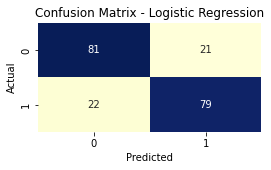

In [62]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression Classifier
LG = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(LG, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Logistic Regression Classifier with the best parameters
best_LG = LogisticRegression(**best_params)

# Fit the model on the training data
best_LG.fit(X_train, y_train)

# Make predictions on the test set
LG_y_pred = best_LG.predict(X_test)

print("Logistic Regression with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, LG_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_LG, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, LG_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC AUC Curve

ROC AUC Score: 0.8374587458745875


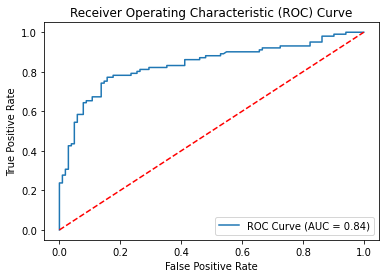

In [63]:
y_prob = best_LG.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Decision Tree Classifier with Hyperparameter Tuning
</span>

</font>

Decision Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       102
           1       0.89      0.78      0.83       101

    accuracy                           0.84       203
   macro avg       0.85      0.84      0.84       203
weighted avg       0.85      0.84      0.84       203

Cross-Validation Scores: [0.74675325 0.73376623 0.83116883 0.7987013  0.80392157]
Mean Cross-Validation Score: 0.7828622358034123


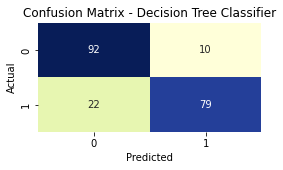

In [64]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = best_dt.predict(X_test)

print("Decision Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_dt, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC AUC Curve

ROC AUC Score: 0.8572607260726073


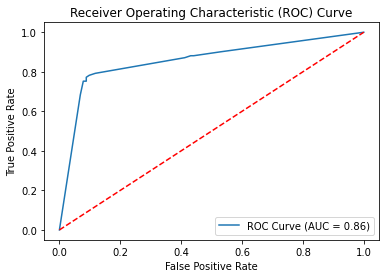

In [65]:
y_prob = best_dt.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Random Forest Classifier with Hyperparameter Tuning
</span>

</font>

Random Forest Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       102
           1       0.85      0.78      0.81       101

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203

Cross-Validation Scores: [0.77922078 0.77272727 0.85714286 0.81818182 0.83006536]
Mean Cross-Validation Score: 0.8114676173499703


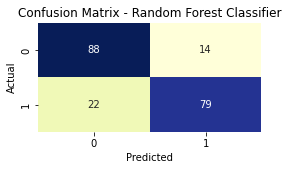

In [66]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Classifier
RF = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(RF, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Random Forest Classifier with the best parameters
best_RF = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_RF.fit(X_train, y_train)

# Make predictions on the test set
RF_y_pred = best_RF.predict(X_test)

print("Random Forest Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, RF_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_RF, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, RF_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC AUC Curve

ROC AUC Score: 0.913511939429237


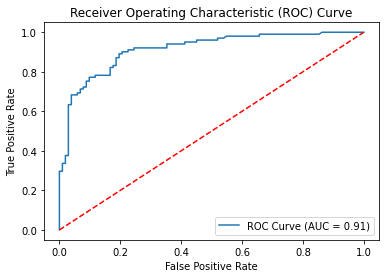

In [67]:
y_prob = best_RF.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
K Neighbour Classifier with Hyperparameter Tuning
</span>

</font>

K Neighbors Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       102
           1       0.83      0.82      0.83       101

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203

Cross-Validation Scores: [0.75974026 0.76623377 0.85064935 0.80519481 0.79738562]
Mean Cross-Validation Score: 0.7958407605466429


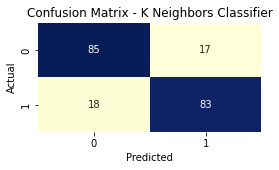

In [68]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the K Neighbors Classifier
KN = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(KN, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the K Neighbors Classifier with the best parameters
best_KN = KNeighborsClassifier(**best_params)

# Fit the model on the training data
best_KN.fit(X_train, y_train)

# Make predictions on the test set
KN_y_pred = best_KN.predict(X_test)

print("K Neighbors Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, KN_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_KN, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, KN_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - K Neighbors Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### ROC AUC Curve

ROC AUC Score: 0.8800718307124831


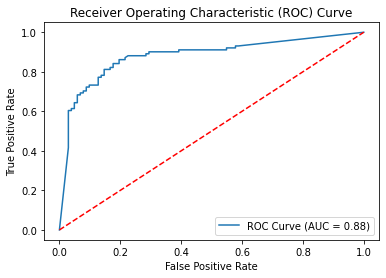

In [69]:
y_prob = best_KN.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Extra Tree Classifier with Hyperparameter Tuning
</span>

</font>

Extra Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       102
           1       0.83      0.79      0.81       101

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203

Cross-Validation Scores: [0.7987013  0.77922078 0.85064935 0.81168831 0.82352941]
Mean Cross-Validation Score: 0.8127578304048892


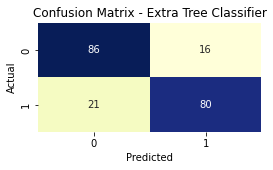

In [70]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Extra Trees Classifier
ET = ExtraTreesClassifier()

# Create the grid search object
grid_search = GridSearchCV(ET, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Create the Extra Trees Classifier with the best parameters
best_ET = ExtraTreesClassifier(**best_params)

# Fit the model on the training data
best_ET.fit(X_train, y_train)

# Make predictions on the test set
ET_y_pred = best_ET.predict(X_test)

print("Extra Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, ET_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_ET, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, ET_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Extra Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC AUC Curve

ROC AUC Score: 0.8926907396622016


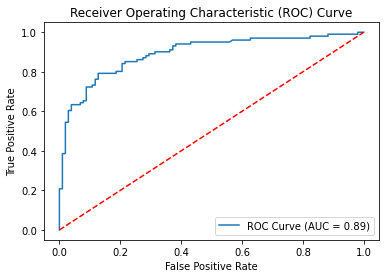

In [71]:
y_prob = best_ET.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Support Vector Classifier with Hyperparameter Tuning
</span>

</font>

Support Vector Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       102
           1       0.81      0.78      0.79       101

    accuracy                           0.80       203
   macro avg       0.80      0.80      0.80       203
weighted avg       0.80      0.80      0.80       203

Cross-Validation Scores: [0.75974026 0.78571429 0.83766234 0.81818182 0.8496732 ]
Mean Cross-Validation Score: 0.810194380782616


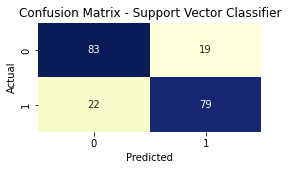

In [72]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVC
SV = SVC()

# Create the grid search object
grid_search = GridSearchCV(SV, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the SVC with the best parameters
best_SV = SVC(**best_params)

# Fit the model on the training data
best_SV.fit(X_train, y_train)

# Make predictions on the test set
SV_y_pred = best_SV.predict(X_test)

print("Support Vector Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, SV_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_SV, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, SV_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC AUC curve

ROC AUC Score: 0.8732770335857114


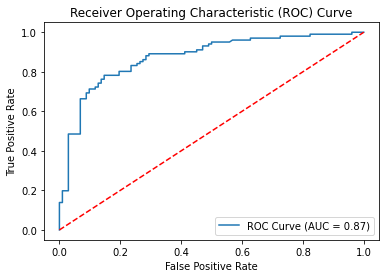

In [73]:
y_prob = best_SV.decision_function(X_test)

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)

print("ROC AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
XGBoost Classifier with Hyperparameter Tuning
</span>

</font>

XGBoost Classifier :
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       102
           1       0.88      0.85      0.86       101

    accuracy                           0.87       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.87      0.87       203

Cross-Validation Scores: [0.81165158 0.7793175  0.89445171 0.88389688 0.86662224]
Mean Cross-Validation Score: 0.8471879817325195


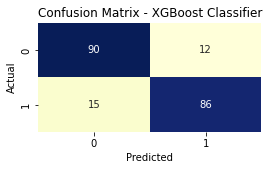

In [74]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the XGBoost classifier
XGB = XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(XGB, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the XGBoost classifier with the best parameters
best_XGB = XGBClassifier(**best_params)

# Fit the model on the training data and make prediction on test data
best_XGB.fit(X_train, y_train)
XGB_y_pred = best_XGB.predict(X_test)


print("XGBoost Classifier :")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, XGB_y_pred))


# Cross-Validation Score
scores = cross_val_score(best_XGB, X, y, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, XGB_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### ROC AUC Curve

ROC AUC Score: 0.901621044457387


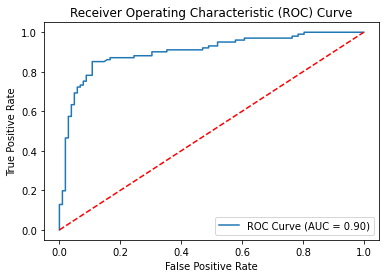

In [75]:
y_prob = best_XGB.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)

print("ROC AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Creating DataFrame of All the Models in Their descending Order
</span>

</font>

In [76]:
# Create a list of model names
model_names = ['Extra Tree Classifier', 'Support Vector Classifier', 'K Neighbour Classifier', 'Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression','XGBoost Classifier']

# Create a list of models and their corresponding accuracy scores
models = [ET, SV, KN, RF, dt, LG]
accuracy_scores = [accuracy_score(y_test, ET_y_pred), accuracy_score(y_test, SV_y_pred), accuracy_score(y_test, KN_y_pred), accuracy_score(y_test, RF_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, LG_y_pred),accuracy_score(y_test, XGB_y_pred)]

# Create a dataframe with model name and accuracy score
df = pd.DataFrame({'Model Name': model_names, 'Accuracy Score': accuracy_scores})

# Sort the dataframe by accuracy score in descending order
df = df.sort_values('Accuracy Score', ascending=False)

# Print the dataframe
df.index = range(1, len(df)+1)
print(df)


                  Model Name  Accuracy Score
1         XGBoost Classifier        0.866995
2   Decision Tree Classifier        0.842365
3     K Neighbour Classifier        0.827586
4   Random Forest Classifier        0.822660
5      Extra Tree Classifier        0.817734
6  Support Vector Classifier        0.798030
7        Logistic Regression        0.788177


<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Save Best Model
</span>

</font>

In [77]:
filename = 'XGBoost.pkl'
pickle.dump(XGB, open(filename, 'wb'))

<font face="cursive" size="8">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
PROJECT COMPLETED
</span>

</font>